# *Tutorial de Preprocesamiento de Datos con Scikit-learn*

En este notebook realizaremos un preprocesamiento de datos utilizando el famoso dataset del Titanic. Este conjunto de datos contiene información sobre los pasajeros del Titanic, incluyendo detalles sobre su supervivencia, características personales, y otros factores relevantes. El objetivo de este preprocesamiento es preparar los datos para un análisis posterior o para alimentar un modelo predictivo.

#### El dataset incluye las siguientes columnas:

- **Pclass:** Clase del pasajero, representando su nivel socioeconómico (1ª clase, 2ª clase, 3ª clase).

- **Survived:** Indica si el pasajero sobrevivió al desastre (1: sobrevivió, 0: no sobrevivió).

- **Name:** Nombre completo del pasajero, incluyendo el título (por ejemplo, "Mr.", "Mrs.").

- **Sex:** Género del pasajero (male: hombre, female: mujer).

- **Age:** Edad del pasajero en años.

- **Sibsp:** Número de hermanos y/o esposos a bordo del Titanic.

- **Parch:** Número de padres y/o hijos a bordo del Titanic.

- **Ticket:** Número del billete del pasajero.

- **Fare:** Tarifa que pagó el pasajero por su billete.

- **Cabin:** Número de la cabina asignada al pasajero (si está disponible).

- **Embarked:** Puerto donde el pasajero abordó el Titanic (C: Cherburgo, Q: Queenstown, S: Southampton).

- **Boat:** Número del bote salvavidas en el que fue rescatado el pasajero (si aplica).

- **Body:** Número de identificación del cuerpo recuperado (si aplica).

- **Home.dest:** Residencia o destino final del pasajero.

### Los pasos que usaremos son los siguientes:

### 1.- Limpieza de datos.

- Eliminación de columnas y filas.

- Corrección de errores.

- Eliminación de valores atipicos.

### 2.- Division de datos.

- Cross validatión (Validación cruzada).

- División en  entrenamiento, validación y prueba.

### 3.- Transformación de datos.

- Imputación.

- Codificación.

- Escalado.

### 4.- Selección o extracción de caracteristicas.

- Selección de caracteristicas.

- Extracción de caracteristicas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.- Limpieza de datos.

In [2]:
# Empezamos leyendo los datos.
df = pd.read_csv('/kaggle/input/titanik-csv/titanic.csv')

In [3]:
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### A.- Eliminación de columnas y filas.

En nuesto caso eliminaremos la columna de name(nombre), home.dest(destino) y cabin, mas que nada por simplicidad


In [4]:
# Podemos hacerlo con la funcion drop, y fijando el axis como 1
df = df.drop(['name', 'home.dest', 'cabin'], axis=1)

In [5]:
# Como se puede ver, ya no existe esta columna 
df.head(3)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,body
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,S,2,NaN
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,S,11,NaN
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,S,NaN,NaN


In [6]:
# También vamos a eliminar las filas donde survived tenga un valor nulo.
df = df.dropna(subset=['survived'])

### B.- Correccion de errores.

In [7]:
df.head(3)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,body
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,S,2,NaN
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,S,11,NaN
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,S,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   float64
 5   parch     1309 non-null   float64
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   embarked  1307 non-null   object 
 9   boat      486 non-null    object 
 10  body      121 non-null    float64
dtypes: float64(7), object(4)
memory usage: 122.7+ KB


 Vamos a:
 - Cambiar el formato de ticket, ya que aunque sea una categoria, al utilizar one-hot-encoder, nos daria muchisimas columnas
 - Cambiar los nulos de body (nº identif.cuerpo) a 0, ya que si es nulo significa que el cuerpo no se recupero, y nos daria una falsa clasificacion al imputar.
 
 En este caso solo realizaremos estas dos correcciones, pero podria pasar que tengamos datos duplicados, errores tipograficos, formato incorrecto o incompletos, error de redondeo, datos desactualizados, etc..

In [9]:
df['ticket'] = pd.to_numeric(df['ticket'], errors='coerce')

In [10]:
df['body'] = df['body'].fillna(0)

### C.- Eliminación de valores atípicos

Vamos a eliminar algunos valores atípicos, en esta visualización vemos algunos, si quieres ver como se hacen estas visualizaciones puedes ver mi otro notebook de analisis y visualización de datos.

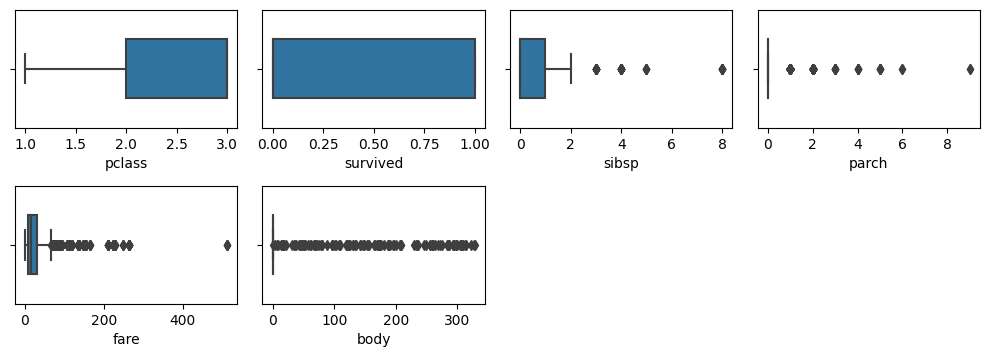

In [11]:
df_num = ['pclass', 'survived', 'sibsp', 'parch', 'fare', 'body']

plt.figure(figsize=(10, 5), dpi=100)

for i, columna in enumerate(df_num, start=1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x=columna, width=0.5)
    
    plt.tight_layout()
    

En este caso solo eliminaremos los de sibsp , ya que los otros no son como tal un valor atipico sino que son mas categorias que valores numericos.


Para hacerlo mas sencillo, en este caso haremos una funcion para utilizarlo a las columnas que querramos, esto nos permitira tambien reutilizar el codigo.

In [12]:
def recortar_valores_atípicos(df, columnas):
    for columna in columnas:
        q1 = df[columna].quantile(0.25) # Primer cuartil (25%)
        q3 = df[columna].quantile(0.75) # Segundo cuartil (75%)
        
        iqr = q3 - q1 # Rango intercuartil
        
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr
        
        # Recorte de valores atipicos
        
    df[columna] = df[columna].clip(lower=limite_inferior, upper=limite_superior)

In [13]:
# Selecionamos las columnas que queremos utilizar la funcion de recorte de valores atípicos.
# Con este codigo podemos seleccionar mas de una columna.
columnas_a_recortar = ['sibsp']

# Utilizamos la función
recortar_valores_atípicos(df, columnas_a_recortar)

<Axes: xlabel='fare'>

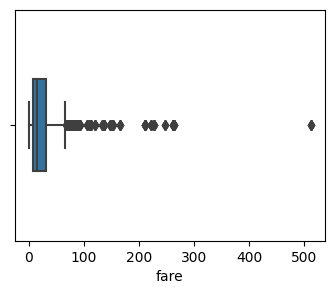

In [14]:
plt.figure(figsize=(4, 3))
sns.boxplot(data=df, x='fare', width=0.4)

Como vemos hemos recortado los valores atipicos.

## 2.- División de datos

Es una buena practica dividir primero los datos antes de transformarlos, asi que eso haremos.

Podemos dividir de dos formas, una mas sencilla que otra, en cross validation y la otra en entrenamiento, validación y prueba

### A.- Validación cruzada

En este caso para la validación cruzada solo seleccionamos las columnas(x) y las etiquetas(y).

In [15]:
x = df.drop('survived', axis=1)
y = df['survived']

### B.- Entrenamiento, validación y prueba.

En este caso aparte de dividir en X y Y, tambien vamos a dividirlo en entrenamiento, validación y prueba, para eso usaremos la funcion train_test_split de sklearn

In [16]:
x = df.drop('survived', axis=1)
y = df['survived']

In [17]:
# Importamos la funcion
from sklearn.model_selection import train_test_split

# Aqui ya estos dividiendo los datos en entrenamiento y prueba, test_size nos dice que porcentaje va al test, en este caso el 3% de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Ahora vamos a dividir test en la mitad, para tener validacion y test a la vez.
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

## 3.- Transformación de datos

Podemos utilizar cada utilidad por separado para cada transformación(imputación, codificación y escalado), pero para entenderlo mejor y reducir el código utilizaremos un pipeline, este código igual se puede copiar y reutilizar.

In [18]:
# importamos las clases que necesitaremos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


En este caso vamos a imputar, escalar y codificar los datos con un pipeline, para simplicidad y escalabilidad, ya que lo podemos copiar y reutilizar perfectamente y hacer pequeñas modificaciones si es necesario.

In [19]:
# Elegimos las columnas categoricas y en otra las numericas
colum_num = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
colum_cat = x.select_dtypes(include=['object']).columns.tolist()

In [20]:
# Creamos un pipeline para las columnas numericas, que son de imputacion y escalado.
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

In [21]:
# Este pipeline es para columnas no numericas o categoricas.
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [22]:
# Ahora uniremos los dos pipelines con columntransformer.
pipeline = ColumnTransformer([
    ('num', numeric_pipeline, colum_num),
    ('cat', categorical_pipeline, colum_cat)
])

Cualquier linea de código anterior se puede modificar, o utilizar solo el pipeline categorico o la numerico.

In [23]:
# Utilizamos el pipeline.

x_train_pip = pipeline.fit_transform(x_train)
# La primera siempre es fit_transform y las siguientes solo transform.
x_val_pip = pipeline.transform(x_val)
x_test_pip = pipeline.transform(x_test)

Como en este caso hemos utilizado la codificación, tenemos que obtener el nombre de las columnas, ya que esta en un formato array.

In [24]:
num_features = colum_num

# Ahora obtenemos los nombres de las columnas categóricas transformadas (generadas por OneHotEncoder)
cat_features = pipeline.named_transformers_['cat']['encoder'].get_feature_names_out(colum_cat)

# Combinamos los nombres de todas las columnas
all_columns = list(num_features) + list(cat_features)

# Convertimos el array a un DataFrame usando los nombres de las columnas
x_train_prep = pd.DataFrame(x_train_pip, columns=all_columns)
x_val_prep = pd.DataFrame(x_val_pip, columns=all_columns)
x_test_prep = pd.DataFrame(x_test_pip, columns=all_columns)

## 4.- Selección o extracción de características.

Solo hay que aplicar uno de los dos, en este caso como no tenemos variables altamente relacionadas ni demasiadas columnas vamos a aplicar selección de caracteriscas pero igual veremos como seria la extracción de caracteristicas.

### A.- Selección de caracteristicas.

La selección de caracteristicas es el proceso de elegir las variables más relevantes de un conjunto de datos, eliminando aquellas que no aportan valor o que pueden generar ruido, para mejorar el rendimiento del modelo y reducir su complejidad.

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10)
rf_model.fit(x_train_prep, y_train)

RandomForestClassifier(n_estimators=10)

In [26]:
rf_model.feature_importances_

array([5.18072968e-02, 6.98472948e-02, 1.81808000e-02, 5.46600870e-03,
       9.80426660e-02, 7.74863141e-02, 1.59014575e-02, 8.80768459e-02,
       1.09747110e-01, 2.68451703e-03, 3.77070430e-03, 4.59869388e-03,
       1.83915006e-03, 3.41384603e-03, 3.47824112e-03, 1.59876104e-03,
       3.19478648e-01, 2.22424781e-03, 4.57073334e-03, 2.39304605e-02,
       4.65522849e-05, 9.12773509e-03, 6.95886868e-03, 1.25689243e-02,
       1.61987579e-03, 1.31476081e-02, 0.00000000e+00, 1.19548518e-03,
       1.11784653e-02, 3.45349508e-05, 0.00000000e+00, 7.21032312e-03,
       6.59226588e-03, 2.27748012e-03, 1.60571305e-02, 5.84095468e-03])

In [27]:
# Unir las importancias con las etiquetas
feature_importance = {name: score for name, score in zip(list(x_train_prep), rf_model.feature_importances_)}
# Creamos un df a partir de este diccionario
feature_importance_df = pd.DataFrame(list(feature_importance.items()), columns=['Feature', 'Importance'])
# Ordenamos de forma descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [28]:
feature_importance_df = pd.DataFrame({'Feature': x_train_prep.columns, 'Importance': rf_model.feature_importances_}).sort_values(by='Importance', ascending=False)

In [29]:
feature_importance_df.head(10)

,Feature,Importance
16,boat_13,0.319479
8,sex_male,0.109747
4,ticket,0.098043
7,sex_female,0.088077
5,fare,0.077486
1,age,0.069847
0,pclass,0.051807
19,boat_15,0.023930
2,sibsp,0.018181
34,boat_C,0.016057


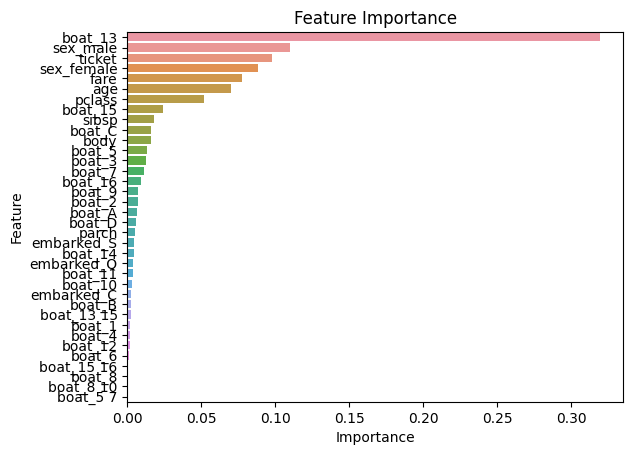

In [30]:
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

plt.title('Feature Importance')

plt.show()

In [31]:
# Elegimos las primeras 6 mejores.
x_train_prep = x_train_prep[feature_importance_df['Feature'].head(9)]

In [32]:
x_train_prep.head()

,boat_13,sex_male,ticket,sex_female,fare,age,pclass,boat_15,sibsp
0,1.0,1.0,0.194677,0.0,-0.261420,0.000000,0.0,0.0,0.0
1,1.0,1.0,0.304852,0.0,-0.294255,-0.258526,0.0,0.0,0.0
2,0.0,0.0,-0.012806,1.0,0.481086,-0.841859,-1.0,0.0,0.0
3,1.0,0.0,0.000000,1.0,2.346182,0.000000,0.0,0.0,2.5
4,1.0,0.0,0.297962,1.0,-0.299428,-0.091859,0.0,0.0,0.0


### B.- Extracción de caracteristicas

Lo que hace PCA es tomar las características originales y transformarlas en un nuevo conjunto de variables (llamadas "componentes principales") que capturan la mayor cantidad de varianza posible en los datos, pero en un espacio reducido. No elimina columnas, sino que genera nuevas características a partir de combinaciones de las originales.
Es muy util cuando tenemos varias caracteristicas o estan altamente relacionadas para reducirlas.

En este caso este dataset no le hace falta, por lo que cargaremos otro dataset para verlo.

In [33]:
df = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
df = df.drop('Id', axis=1)

In [34]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


En este caso vemos que hay caracteristcas con alta correlación.

<Axes: >

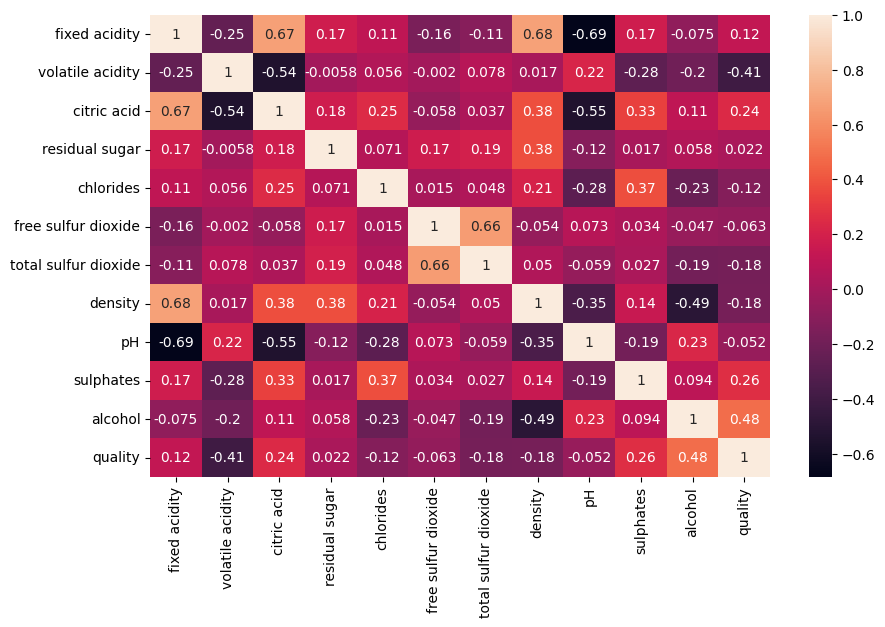

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)

Es importante que este escaldo pero imaginemos que el dataset ya paso por el preprocesamiento y ya esta escalado.

In [36]:
x = df.drop('quality', axis=1)

# Normalizamos los datos con StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [37]:
# Podemos poner cuanto porcentaje de variabilidad queremos conservar o cuantos  compones (columnas), queremos
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_reduced = pca.fit_transform(x_scaled)

In [38]:
pca.explained_variance_ratio_

array([0.28692345, 0.17075104])

In [39]:
pca.n_components_

2

In [40]:
df_reduced = pd.DataFrame(df_reduced, columns=['c1', 'c2'])

In [41]:
df_reduced.head()

,c1,c2
0,-1.561545,0.444892
1,-0.760892,1.915058
2,-0.708085,0.914423
3,2.308166,-0.224448
4,-1.561545,0.444892


Hasta aqui llega este notebook, los proximos pasos para un proyecto de ml serian el entrenamiento y la evaluación, eso lo explico en los otro notebooks que tengo.